In [1]:
import pandas as pd
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
from matplotlib import rcParams, gridspec
from pandas.api.types import CategoricalDtype

import sklearn
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('tech_serum_hackathon_data.csv')

In [3]:
data.columns

Index(['cancer_actual', 'pred_cancer', 'gender', 'age', 'FIPS', 'race',
       'ethnicity', 'sun_exposure', 'sunburn_5OrMore', 'family_history',
       'personal_history', 'hair_color', 'eye_color', 'prob_cancer',
       'pct_fair_poor_health', 'pct_smokers', 'pct_adults_obesity',
       'pct_physically_inactive', 'pct_access_exercise_opp',
       'primary_care_physician_rate', 'prev_hosp_rate', 'pct_annual_mammogram',
       'pct_single_parent_homes', 'county', 'state', 'pct_gt_high_school',
       'pct_gt_bachelors', 'pct_public_ins_lt_65', 'pct_public_ins_lt_19',
       'pct_public_ins_19_to_64', 'unemployment_pct', 'pct_married_15_over',
       'pct_2_plus_races', 'pct_white', 'pct_black', 'pct_am_ind_AK_native',
       'pct_asian', 'pct_HA_pacific_islander', 'pct_hispanic', 'med_hh_income',
       'pct_govt_cash_asst', 'pct_food_stamps', 'pct_lt_poverty',
       'pct_private_ins_lt_65', 'pct_private_ins_lt_19',
       'pct_private_ins_19_to_64', 'rural_mic_metro', 'rural_metro', '

In [4]:
data.groupby('family_history')['family_history'].count()

family_history
Does Not Have Family History    52449
Has Family History               7553
Name: family_history, dtype: int64

In [5]:
# Recode gender variable
def sunburn_rc(series):
    if series == 'Less than 5 Sunburns':
        return 0
    elif series == '5 or More Sunburns':
        return 1
    
data.loc[:, 'sunburn_5OrMore'] = data.sunburn_5OrMore.apply(sunburn_rc)

In [6]:
# Recode gender variable
def sun_exp_rc(series):
    if series == 'Occasional Sun Exposure':
        return 0
    elif series == 'Regular Sun Exposure':
        return 1
    
data.loc[:, 'sun_exposure'] = data.sun_exposure.apply(sun_exp_rc)

In [7]:
# Recode gender variable
def pers_hist_rc(series):
    if series == 'Does Not Have Personal History':
        return 0
    elif series == 'Has Personal History':
        return 1
    
data.loc[:, 'personal_history'] = data.personal_history.apply(pers_hist_rc)

In [8]:
# Recode gender variable
def fam_hist_rc(series):
    if series == 'Does Not Have Family History':
        return 0
    elif series == 'Has Family History':
        return 1
    
data.loc[:, 'family_history'] = data.family_history.apply(fam_hist_rc)

In [9]:
# Recode gender variable
def metro_mic_rc(series):
    if series == 'Rural':
        return 0
    elif series == 'Micropolitan':
        return 1
    elif series == 'Metropolitan':
        return 2
    
data.loc[:, 'rural_mic_metro'] = data.rural_mic_metro.apply(metro_mic_rc)

In [10]:
# Recode gender variable
def metro_rc(series):
    if series == 'Rural':
        return 0
    elif series == 'Metropolitan':
        return 1
    
data.loc[:, 'rural_metro'] = data.rural_metro.apply(metro_rc)

In [11]:
# Recode gender variable
def gender_rc(series):
    if series == 'male':
        return 0
    elif series == 'female':
        return 1
    
data.loc[:, 'gender'] = data.gender.apply(gender_rc)

In [12]:
# Recode gender variable
def expand_rc(series):
    if series == 'Did_Not_Expand_Medicaid':
        return 0
    elif series == 'Expanded_Medicaid':
        return 1
    
data.loc[:, 'expansion_status'] = data.expansion_status.apply(expand_rc)

In [13]:
# Recode gender variable
def hispanic_rc(series):
    if series == 'Not Hispanic':
        return 0
    elif series == 'Hispanic':
        return 1
    
data.loc[:, 'ethnicity'] = data.ethnicity.apply(hispanic_rc)

In [16]:
data_sm = data.drop(columns=['pred_cancer','FIPS','county','state'])

In [17]:
data_dumm = pd.get_dummies(data_sm, columns=['region','race','hair_color','eye_color'])

In [18]:
data_predictors = data_dumm.drop(columns = ['cancer_actual'])
response = data_dumm.loc[:,['cancer_actual']]

In [19]:
col_order = ['gender', 'sun_exposure', 'sunburn_5OrMore', 'family_history',
       'personal_history', 'ethnicity', 'rural_mic_metro',
       'rural_metro', 'expansion_status', 'region_Midwest', 'region_Northeast',
       'region_South', 'region_West', 'race_Asian', 'race_Black', 'race_Other',
       'race_White','hair_color_Black', 'hair_color_Blonde',
       'hair_color_Brown', 'hair_color_Red', 'eye_color_Blue',
       'eye_color_Brown', 'eye_color_Green','prob_cancer','pct_fair_poor_health',
       'pct_smokers','pct_adults_obesity', 'pct_physically_inactive',
       'pct_access_exercise_opp', 'primary_care_physician_rate',
       'prev_hosp_rate', 'pct_annual_mammogram', 'pct_single_parent_homes',
       'pct_gt_high_school', 'pct_gt_bachelors', 'pct_public_ins_lt_65',
       'pct_public_ins_lt_19', 'pct_public_ins_19_to_64', 'unemployment_pct',
       'pct_married_15_over', 'pct_2_plus_races', 'pct_white', 'pct_black',
       'pct_am_ind_AK_native', 'pct_asian', 'pct_HA_pacific_islander',
       'pct_hispanic', 'med_hh_income', 'pct_govt_cash_asst',
       'pct_food_stamps', 'pct_lt_poverty', 'pct_private_ins_lt_65',
       'pct_private_ins_lt_19', 'pct_private_ins_19_to_64','age','uv_index']

data_ordered = data_predictors.loc[:, col_order]
columns = data_ordered.columns

In [20]:
# Change response and predictor data frames to numpy arrays
data_imp_np = np.array(data_ordered)
response_np = np.array(response)

In [21]:
# Create holdout data set and keep remaining 80% in one data frame
# Used stratefied random sampling because there was class imbalance
sss = StratifiedShuffleSplit(n_splits = 2, test_size=0.2, random_state=0)

sss.get_n_splits(data_imp_np, response_np)

for train_index, test_index in sss.split(data_imp_np, response_np):
    x_train_temp, x_test = data_imp_np[train_index], data_imp_np[test_index]
    y_train_temp, y_test = response_np[train_index], response_np[test_index]

# Split the remaining data into a training and validation data set (50% and 30% respectively)
sss_valid = StratifiedShuffleSplit(n_splits = 2, test_size = 0.3, random_state = 10)  
    
for train_index, test_index in sss_valid.split(x_train_temp, y_train_temp):
    x_train, x_validation = x_train_temp[train_index], x_train_temp[test_index]
    y_train, y_validation = y_train_temp[train_index], y_train_temp[test_index]

In [22]:
imputation = make_column_transformer((SimpleImputer(strategy='most_frequent'),  [*range(0, 24, 1)]),(SimpleImputer(strategy = 'most_frequent'), [*range(24, 57, 1)]))
impute_train = imputation.fit(x_train)

preprocessing = make_column_transformer((MinMaxScaler(), [*range(0, 24, 1)]),(SimpleImputer(strategy = 'most_frequent'), [*range(24, 57, 1)]))
preprocess_train = preprocessing.fit(x_train)

x_train = impute_train.transform(x_train)
x_validation = impute_train.transform(x_validation)
x_test = impute_train.transform(x_test)

x_train = preprocess_train.transform(x_train)
x_validation = preprocess_train.transform(x_validation)
x_test = preprocess_train.transform(x_test)

In [23]:
# Create user-defined function to create formatted confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print ()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=20, fontsize = 14)
    plt.yticks(tick_marks, classes, fontsize = 14)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 14)
    plt.xlabel('Predicted label', fontsize = 14)


In [24]:
# Run default gradient boosted trees model to get baseline accuracy and feature importances
gbt_model = GradientBoostingClassifier(random_state=75)
gbt_model.fit(x_train, np.ravel(y_train, order='C'))
valid_predict_gbt = gbt_model.predict(x_validation)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13236
           1       0.89      0.82      0.85      1165

    accuracy                           0.98     14401
   macro avg       0.94      0.90      0.92     14401
weighted avg       0.98      0.98      0.98     14401


Normalized confusion matrix



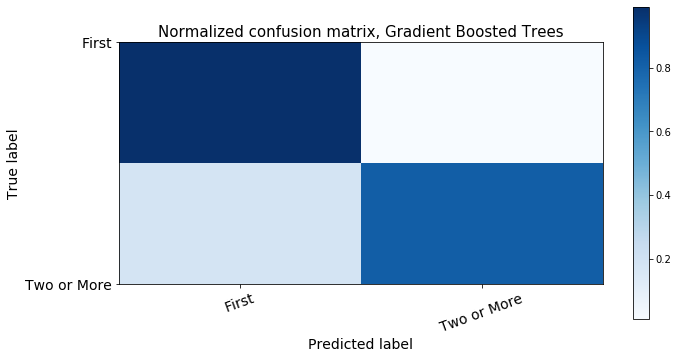

In [25]:
# Evaluation metrics and feature importances to narrow down variables I need
print(classification_report(y_validation, valid_predict_gbt))

class_names = ['First', 'Two or More']

# Compute confusion matrix
cnf_matrix_gbt = confusion_matrix(y_validation, valid_predict_gbt)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places

# Plot normalized confusion matrix
plt.figure(figsize=(10,5))
plot_confusion_matrix(cnf_matrix_gbt, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, Gradient Boosted Trees')

In [26]:
print(pd.DataFrame({'features': data_ordered.columns,
                    'importances': gbt_model.feature_importances_}).sort_values(['importances'], ascending = 0).iloc[0:30,:])


                       features  importances
48                med_hh_income     0.682752
24                  prob_cancer     0.266429
2               sunburn_5OrMore     0.015604
1                  sun_exposure     0.007442
14                   race_Black     0.007144
55                          age     0.002800
4              personal_history     0.001934
31               prev_hosp_rate     0.001335
21               eye_color_Blue     0.001115
0                        gender     0.001095
54     pct_private_ins_19_to_64     0.001024
3                family_history     0.000844
43                    pct_black     0.000841
42                    pct_white     0.000800
39             unemployment_pct     0.000767
37         pct_public_ins_lt_19     0.000659
38      pct_public_ins_19_to_64     0.000618
50              pct_food_stamps     0.000546
34           pct_gt_high_school     0.000447
28      pct_physically_inactive     0.000434
51               pct_lt_poverty     0.000427
40        

In [27]:
rf_model = RandomForestClassifier(random_state=75)
rf_model.fit(x_train, np.ravel(y_train, order='C'))
valid_predict_rf = rf_model.predict(x_validation)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13236
           1       0.86      0.76      0.81      1165

    accuracy                           0.97     14401
   macro avg       0.92      0.87      0.89     14401
weighted avg       0.97      0.97      0.97     14401

                       features  importances
48                med_hh_income     0.196007
24                  prob_cancer     0.191418
26                  pct_smokers     0.047988
50              pct_food_stamps     0.043400
36         pct_public_ins_lt_65     0.034412
35             pct_gt_bachelors     0.031853
52        pct_private_ins_lt_65     0.027449
53        pct_private_ins_lt_19     0.025763
25         pct_fair_poor_health     0.025039
55                          age     0.024189
2               sunburn_5OrMore     0.022879
51               pct_lt_poverty     0.016266
1                  sun_exposure     0.015724
39             unemployment_pct     0.01516

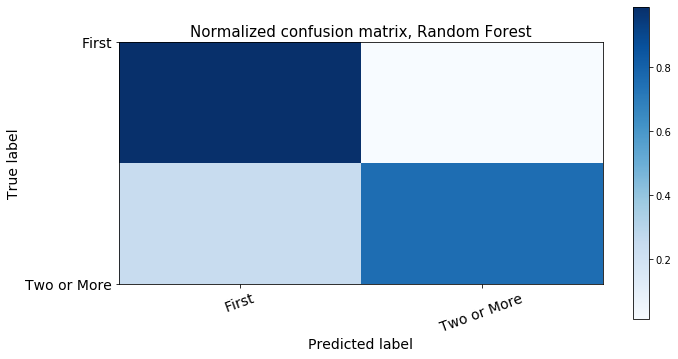

In [28]:
# Evaluation metrics and feature importances to narrow down variables I need
print(classification_report(y_validation, valid_predict_rf))

# Print feature importances to subset data set to more important variables
print(pd.DataFrame({'features': columns,
                    'importances': rf_model.feature_importances_}).sort_values(['importances'], ascending = 0))

class_names = ['First', 'Two or More']

# Compute confusion matrix
cnf_matrix_rf = confusion_matrix(y_validation, valid_predict_rf)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places

# Plot normalized confusion matrix
plt.figure(figsize=(10,5))
plot_confusion_matrix(cnf_matrix_rf, classes=class_names, 
                      normalize=True,title='Normalized confusion matrix, Random Forest')


In [29]:
# Create a medium-sized data set with all variables above 0.005 in importance
x_train_sm = x_train[:, [48,24,26,50,36,35,25,55,2,1,39,47,29,56,40,31,33,14]]
x_validation_sm = x_validation[:, [48,24,26,50,36,35,25,55,2,1,39,47,29,56,40,31,33,14]]
x_test_sm = x_test[:, [48,24,26,50,36,35,25,55,2,1,39,47,29,56,40,31,33,14]]
features_sm = data_ordered.iloc[:, [48,24,26,50,36,35,25,55,2,1,39,47,29,56,40,31,33,14]]

In [30]:
# Gradient boosted trees, varying the maximum depth of the tree
max_depth = [5, 7, 9, 15, 20]

results_dctree_max_depth = pd.DataFrame([])

for i in range(0,5):
    
    print(i)
    
    max_depth_value = max_depth[i]
    
    dctree_model = DecisionTreeClassifier(random_state = 75, max_depth = max_depth_value)

    dctree_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_dctree = dctree_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_dctree, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_dctree, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'max_depth'] = max_depth_value
    class_report.loc[:, 'model'] = 'Decision Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_dctree_max_depth = pd.concat([results_dctree_max_depth, class_report], axis = 0)
    

0
1
2
3
4


In [31]:
results_dctree_max_depth

,precision,recall,f1-score,support,accuracy,max_depth,model,model_value
0,0.983430,0.990934,0.987167,13236.0,0.976321,5,Decision Trees,First Treatment Episode
1,0.887218,0.810300,0.847017,1165.0,0.976321,5,Decision Trees,2+ Treatment Episodes
0,0.983338,0.989876,0.986596,13236.0,0.975279,7,Decision Trees,First Treatment Episode
1,0.875580,0.809442,0.841213,1165.0,0.975279,7,Decision Trees,2+ Treatment Episodes
0,0.980945,0.987912,0.984416,13236.0,0.971252,9,Decision Trees,First Treatment Episode
1,0.850607,0.781974,0.814848,1165.0,0.971252,9,Decision Trees,2+ Treatment Episodes
0,0.980564,0.983379,0.981969,13236.0,0.966808,15,Decision Trees,First Treatment Episode
1,0.804791,0.778541,0.791449,1165.0,0.966808,15,Decision Trees,2+ Treatment Episodes
0,0.980139,0.980583,0.980361,13236.0,0.963891,20,Decision Trees,First Treatment Episode
1,0.778257,0.774249,0.776248,1165.0,0.963891,20,Decision Trees,2+ Treatment Episodes


In [32]:
# Gradient boosted trees, varying the maximum depth of the tree
min_samples_split = [2, 4, 7, 15, 30, 40, 50]

results_dctree_min_samples = pd.DataFrame([])

for i in range(0,7):
    
    print(i)
    
    min_samples_split_value = min_samples_split[i]
    
    dctree_model = DecisionTreeClassifier(random_state = 75, min_samples_split = min_samples_split_value)

    dctree_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_dctree = dctree_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_dctree, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_dctree, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'min_samples_split'] = min_samples_split_value
    class_report.loc[:, 'model'] = 'Decision Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_dctree_min_samples = pd.concat([results_dctree_min_samples, class_report], axis = 0)
    

0
1
2
3
4
5
6


In [33]:
results_dctree_min_samples

,precision,recall,f1-score,support,accuracy,min_samples_split,model,model_value
0,0.980024,0.978543,0.979283,13236.0,0.961947,2,Decision Trees,First Treatment Episode
1,0.760338,0.773391,0.766809,1165.0,0.961947,2,Decision Trees,2+ Treatment Episodes
0,0.979332,0.980885,0.980108,13236.0,0.963405,4,Decision Trees,First Treatment Episode
1,0.778846,0.764807,0.771763,1165.0,0.963405,4,Decision Trees,2+ Treatment Episodes
0,0.979153,0.982925,0.981035,13236.0,0.965072,7,Decision Trees,First Treatment Episode
1,0.797127,0.762232,0.779289,1165.0,0.965072,7,Decision Trees,2+ Treatment Episodes
0,0.980006,0.985041,0.982517,13236.0,0.967780,15,Decision Trees,First Treatment Episode
1,0.819508,0.771674,0.794872,1165.0,0.967780,15,Decision Trees,2+ Treatment Episodes
0,0.981288,0.986552,0.983913,13236.0,0.970349,30,Decision Trees,First Treatment Episode
1,0.837294,0.786266,0.810978,1165.0,0.970349,30,Decision Trees,2+ Treatment Episodes


In [34]:
# Gradient boosted trees, varying the maximum depth of the tree
max_features = [5, 7, 9, 12, 15]

results_dctree_max_feat = pd.DataFrame([])

for i in range(0,5):
    
    print(i)
    
    max_feat_value = max_features[i]
    
    dctree_model = DecisionTreeClassifier(random_state = 75, max_features = max_feat_value)

    dctree_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_dctree = dctree_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_dctree, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_dctree, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'max_features'] = max_feat_value
    class_report.loc[:, 'model'] = 'Decision Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_dctree_max_feat = pd.concat([results_dctree_max_feat, class_report], axis = 0)
    

0
1
2
3
4


In [35]:
results_dctree_max_feat

,precision,recall,f1-score,support,accuracy,max_features,model,model_value
0,0.978417,0.979526,0.978971,13236.0,0.961322,5,Decision Trees,First Treatment Episode
1,0.764348,0.754506,0.759395,1165.0,0.961322,5,Decision Trees,2+ Treatment Episodes
0,0.978955,0.980508,0.979730,13236.0,0.962711,7,Decision Trees,First Treatment Episode
1,0.774476,0.760515,0.767432,1165.0,0.962711,7,Decision Trees,2+ Treatment Episodes
0,0.979837,0.980281,0.980059,13236.0,0.963336,9,Decision Trees,First Treatment Episode
1,0.774806,0.770815,0.772806,1165.0,0.963336,9,Decision Trees,2+ Treatment Episodes
0,0.979817,0.979299,0.979558,13236.0,0.962433,12,Decision Trees,First Treatment Episode
1,0.766212,0.770815,0.768507,1165.0,0.962433,12,Decision Trees,2+ Treatment Episodes
0,0.979220,0.979072,0.979146,13236.0,0.961669,15,Decision Trees,First Treatment Episode
1,0.762639,0.763948,0.763293,1165.0,0.961669,15,Decision Trees,2+ Treatment Episodes


In [36]:
# Compare accuracy of default model with medium and large data frames
# Run default gradient boosted trees model to get baseline accuracy and feature importances
gbt_model_sm = GradientBoostingClassifier(random_state=75)
gbt_model_sm.fit(x_train_sm, np.ravel(y_train, order='C'))
valid_predict_gbt_sm = gbt_model_sm.predict(x_validation_sm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13236
           1       0.89      0.81      0.85      1165

    accuracy                           0.98     14401
   macro avg       0.94      0.90      0.92     14401
weighted avg       0.98      0.98      0.98     14401


Normalized confusion matrix



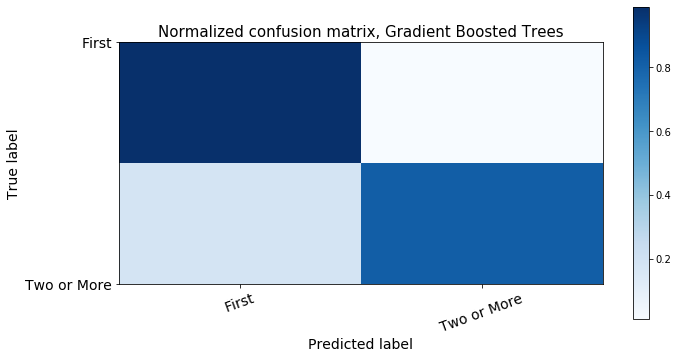

In [37]:
# Evaluation metrics are the same as with the full data set so stick with the limited data set
print(classification_report(y_validation, valid_predict_gbt_sm))

class_names = ['First', 'Two or More']

# Compute confusion matrix
cnf_matrix_gbt_sm = confusion_matrix(y_validation, valid_predict_gbt_sm)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places

# Plot normalized confusion matrix
plt.figure(figsize=(10,5))
plot_confusion_matrix(cnf_matrix_gbt_sm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, Gradient Boosted Trees')


In [38]:
# Gradient boosted trees, grid search varying the number of estimators
n_estimators = [50, 100, 150, 200, 300]

results_gbt_nEst = pd.DataFrame([])

for i in range(0,5):
    
    print(i)
    
    est_value = n_estimators[i]

    gbt_model = GradientBoostingClassifier(random_state = 75, n_estimators = est_value)

    gbt_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_gbt = gbt_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'n_estimators'] = est_value
    class_report.loc[:, 'model'] = 'Gradient Boosted Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_gbt_nEst = pd.concat([results_gbt_nEst, class_report], axis = 0)
    

0
1
2
3
4


In [39]:
results_gbt_nEst

,precision,recall,f1-score,support,accuracy,n_estimators,model,model_value
0,0.983512,0.991463,0.987471,13236.0,0.976877,50,Gradient Boosted Trees,First Treatment Episode
1,0.893195,0.811159,0.850202,1165.0,0.976877,50,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983800,0.991009,0.987391,13236.0,0.976738,100,Gradient Boosted Trees,First Treatment Episode
1,0.888577,0.814592,0.849978,1165.0,0.976738,100,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983796,0.990783,0.987277,13236.0,0.976529,150,Gradient Boosted Trees,First Treatment Episode
1,0.886088,0.814592,0.848837,1165.0,0.976529,150,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983721,0.990707,0.987202,13236.0,0.976391,200,Gradient Boosted Trees,First Treatment Episode
1,0.885154,0.813734,0.847943,1165.0,0.976391,200,Gradient Boosted Trees,2+ Treatment Episodes
0,0.984232,0.990329,0.987271,13236.0,0.976529,300,Gradient Boosted Trees,First Treatment Episode
1,0.881810,0.819742,0.849644,1165.0,0.976529,300,Gradient Boosted Trees,2+ Treatment Episodes


In [40]:
# Gradient boosted trees, varying the maximum depth of the tree
max_depth = [5, 7, 9, 15]

results_gbt_max_depth = pd.DataFrame([])

for i in range(0,4):
    
    print(i)
    
    max_depth_value = max_depth[i]
    
    gbt_model = GradientBoostingClassifier(random_state = 75, n_estimators = 100, max_depth = max_depth_value)

    gbt_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_gbt = gbt_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'max_depth'] = max_depth_value
    class_report.loc[:, 'n_estimators'] = 100
    class_report.loc[:, 'model'] = 'Gradient Boosted Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_gbt_max_depth = pd.concat([results_gbt_max_depth, class_report], axis = 0)
    

0
1
2
3


In [41]:
results_gbt_max_depth

,precision,recall,f1-score,support,accuracy,max_depth,n_estimators,model,model_value
0,0.984440,0.989423,0.986925,13236.0,0.975904,5,100,Gradient Boosted Trees,First Treatment Episode
1,0.872495,0.822318,0.846664,1165.0,0.975904,5,100,Gradient Boosted Trees,2+ Treatment Episodes
0,0.984504,0.988818,0.986657,13236.0,0.975418,7,100,Gradient Boosted Trees,First Treatment Episode
1,0.866305,0.823176,0.844190,1165.0,0.975418,7,100,Gradient Boosted Trees,2+ Treatment Episodes
0,0.984127,0.988365,0.986241,13236.0,0.974655,9,100,Gradient Boosted Trees,First Treatment Episode
1,0.861011,0.818884,0.839419,1165.0,0.974655,9,100,Gradient Boosted Trees,2+ Treatment Episodes
0,0.981880,0.986627,0.984248,13236.0,0.970974,15,100,Gradient Boosted Trees,First Treatment Episode
1,0.839237,0.793133,0.815534,1165.0,0.970974,15,100,Gradient Boosted Trees,2+ Treatment Episodes


In [42]:
# Gradient boosted trees, grid search varying the learning rate
# Going to compare the results of this to the results from n_estimators because these hyperparameters present a trade off
learning_rate = [0.05, 0.15, 0.3, 0.35]

results_gbt_learn_rate = pd.DataFrame([])

for i in range(0,4):
    
    print(i)
    
    learn_rate_value = learning_rate[i]

    gbt_model = GradientBoostingClassifier(random_state = 75, learning_rate = learn_rate_value)

    gbt_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_gbt = gbt_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'learning_rate'] = learn_rate_value
    class_report.loc[:, 'model'] = 'Gradient Boosted Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_gbt_learn_rate = pd.concat([results_gbt_learn_rate, class_report], axis = 0)


0
1
2
3


In [43]:
results_gbt_learn_rate

,precision,recall,f1-score,support,accuracy,learning_rate,model,model_value
0,0.983513,0.991538,0.987509,13236.0,0.976946,0.05,Gradient Boosted Trees,First Treatment Episode
1,0.894040,0.811159,0.850585,1165.0,0.976946,0.05,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983790,0.990405,0.987086,13236.0,0.976182,0.15,Gradient Boosted Trees,First Treatment Episode
1,0.881970,0.814592,0.846943,1165.0,0.976182,0.15,Gradient Boosted Trees,2+ Treatment Episodes
0,0.984288,0.989196,0.986736,13236.0,0.975557,0.30,Gradient Boosted Trees,First Treatment Episode
1,0.869882,0.820601,0.844523,1165.0,0.975557,0.30,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983921,0.989347,0.986626,13236.0,0.975349,0.35,Gradient Boosted Trees,First Treatment Episode
1,0.870879,0.816309,0.842712,1165.0,0.975349,0.35,Gradient Boosted Trees,2+ Treatment Episodes


In [44]:
# Gradient boosted trees, grid search varying learning rate and maximum depth of trees
learning_rate = [0.05, 0.15, 0.3]
max_depth = [5, 7, 9]

results_gbt_lrate_depth = pd.DataFrame([])

for i, j in itertools.product(range(0,3), range(0,3)):
    
    print(i)
    print(j)
    
    max_depth_value = max_depth[i]
    
    learning_rate_value = learning_rate[j]

    gbt_model = GradientBoostingClassifier(random_state = 75, max_depth = max_depth_value,
                                           learning_rate = learning_rate_value)

    gbt_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_gbt = gbt_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'max_depth'] = max_depth_value
    class_report.loc[:, 'learning_rate'] = learning_rate_value
    class_report.loc[:, 'model'] = 'Gradient Boosted Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_gbt_lrate_depth = pd.concat([results_gbt_lrate_depth, class_report], axis = 0)


0
0
0
1
0
2
1
0
1
1
1
2
2
0
2
1
2
2


In [45]:
results_gbt_lrate_depth

,precision,recall,f1-score,support,accuracy,max_depth,learning_rate,model,model_value
0,0.983720,0.990632,0.987164,13236.0,0.976321,5,0.05,Gradient Boosted Trees,First Treatment Episode
1,0.884328,0.813734,0.847564,1165.0,0.976321,5,0.05,Gradient Boosted Trees,2+ Treatment Episodes
0,0.984208,0.988818,0.986508,13236.0,0.975141,5,0.15,Gradient Boosted Trees,First Treatment Episode
1,0.865820,0.819742,0.842152,1165.0,0.975141,5,0.15,Gradient Boosted Trees,2+ Treatment Episodes
0,0.984010,0.985645,0.984827,13236.0,0.972085,5,0.30,Gradient Boosted Trees,First Treatment Episode
1,0.833771,0.818026,0.825823,1165.0,0.972085,5,0.30,Gradient Boosted Trees,2+ Treatment Episodes
0,0.984652,0.988818,0.986731,13236.0,0.975557,7,0.05,Gradient Boosted Trees,First Treatment Episode
1,0.866546,0.824893,0.845207,1165.0,0.975557,7,0.05,Gradient Boosted Trees,2+ Treatment Episodes
0,0.984176,0.986778,0.985476,13236.0,0.973266,7,0.15,Gradient Boosted Trees,First Treatment Episode
1,0.845133,0.819742,0.832244,1165.0,0.973266,7,0.15,Gradient Boosted Trees,2+ Treatment Episodes


In [46]:
# Gradient boosted trees, attempting early stopping with minimum impurity decrease
min_imp_dec = [0.25, 0.5, 0.1]

results_gbt_imp_dec = pd.DataFrame([])

for i in range(0,3):
    
    print(i)
    
    min_imp_value = min_imp_dec[i]

    gbt_model = GradientBoostingClassifier(random_state = 75, learning_rate = 0.3, 
                                           min_impurity_decrease = min_imp_value)

    gbt_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_gbt = gbt_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'min_impurity_decrease'] = min_imp_value
    class_report.loc[:, 'learning_rate'] = 0.3
    class_report.loc[:, 'model'] = 'Gradient Boosted Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_gbt_imp_dec = pd.concat([results_gbt_imp_dec, class_report], axis = 0)


0
1
2


In [47]:
results_gbt_imp_dec

,precision,recall,f1-score,support,accuracy,min_impurity_decrease,learning_rate,model,model_value
0,0.983653,0.991085,0.987355,13236.0,0.976668,0.25,0.3,Gradient Boosted Trees,First Treatment Episode
1,0.889202,0.812876,0.849327,1165.0,0.976668,0.25,0.3,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983512,0.991463,0.987471,13236.0,0.976877,0.50,0.3,Gradient Boosted Trees,First Treatment Episode
1,0.893195,0.811159,0.850202,1165.0,0.976877,0.50,0.3,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983571,0.990556,0.987051,13236.0,0.976113,0.10,0.3,Gradient Boosted Trees,First Treatment Episode
1,0.883287,0.812017,0.846154,1165.0,0.976113,0.10,0.3,Gradient Boosted Trees,2+ Treatment Episodes


In [48]:
# Gradient boosted trees, grid search varying maximum depth and max_features
max_depth = [7, 9]
max_features = [7, 10, 15]

results_gbt_feat_maxdepth = pd.DataFrame([])

for i, j in itertools.product(range(0,2), range(0,3)):
    
    max_depth_value = max_depth[i]
    
    max_feat_value = max_features[j]

    gbt_model = GradientBoostingClassifier(random_state = 75, max_depth = max_depth_value,
                                           learning_rate = 0.3, max_features = max_feat_value)

    gbt_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_gbt = gbt_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'max_depth'] = max_depth_value
    class_report.loc[:, 'max_features'] = max_feat_value
    class_report.loc[:, 'learning_rate'] = 0.3
    class_report.loc[:, 'model'] = 'Gradient Boosted Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_gbt_feat_maxdepth = pd.concat([results_gbt_feat_maxdepth, class_report], axis = 0)


In [49]:
results_gbt_feat_maxdepth

,precision,recall,f1-score,support,accuracy,max_depth,max_features,learning_rate,model,model_value
0,0.983578,0.986476,0.985025,13236.0,0.972432,7,7,0.3,Gradient Boosted Trees,First Treatment Episode
1,0.841030,0.812876,0.826713,1165.0,0.972432,7,7,0.3,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983205,0.986325,0.984763,13236.0,0.971946,7,10,0.3,Gradient Boosted Trees,First Treatment Episode
1,0.838825,0.808584,0.823427,1165.0,0.971946,7,10,0.3,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983064,0.986703,0.984880,13236.0,0.972155,7,15,0.3,Gradient Boosted Trees,First Treatment Episode
1,0.842294,0.806867,0.824200,1165.0,0.972155,7,15,0.3,Gradient Boosted Trees,2+ Treatment Episodes
0,0.983238,0.988290,0.985757,13236.0,0.973752,9,7,0.3,Gradient Boosted Trees,First Treatment Episode
1,0.858706,0.808584,0.832891,1165.0,0.973752,9,7,0.3,Gradient Boosted Trees,2+ Treatment Episodes
0,0.984116,0.987685,0.985897,13236.0,0.974030,9,10,0.3,Gradient Boosted Trees,First Treatment Episode
1,0.854073,0.818884,0.836109,1165.0,0.974030,9,10,0.3,Gradient Boosted Trees,2+ Treatment Episodes


In [50]:
# Stochastic Gradient Boosted Trees, grid search with varying sub-samples
sub_sample = [0.8, 0.9, 0.95]

results_stoch_grad = pd.DataFrame([])

for i in range(0,3):
    
    print(i)
    
    subsample_value = sub_sample[i]

    stoch_grad_model = GradientBoostingClassifier(random_state = 75, subsample = subsample_value)

    stoch_grad_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_stoch_grad = stoch_grad_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_stoch_grad, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_gbt, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'subsample'] = subsample_value
    class_report.loc[:, 'model'] = 'Stochastic Gradient Boosted Trees'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_stoch_grad = pd.concat([results_stoch_grad, class_report], axis = 0)


0
1
2


In [51]:
results_stoch_grad

,precision,recall,f1-score,support,accuracy,subsample,model,model_value
0,0.983503,0.990934,0.987205,13236.0,0.973682,0.80,Stochastic Gradient Boosted Trees,First Treatment Episode
1,0.887324,0.811159,0.847534,1165.0,0.973682,0.80,Stochastic Gradient Boosted Trees,2+ Treatment Episodes
0,0.983507,0.991160,0.987319,13236.0,0.973682,0.90,Stochastic Gradient Boosted Trees,First Treatment Episode
1,0.889831,0.811159,0.848675,1165.0,0.973682,0.90,Stochastic Gradient Boosted Trees,2+ Treatment Episodes
0,0.983432,0.991085,0.987244,13236.0,0.973682,0.95,Stochastic Gradient Boosted Trees,First Treatment Episode
1,0.888889,0.810300,0.847777,1165.0,0.973682,0.95,Stochastic Gradient Boosted Trees,2+ Treatment Episodes


In [52]:
# Running a default random forest model
rf_model_default = RandomForestClassifier(random_state=75)
rf_model_default.fit(x_train_sm, np.ravel(y_train, order='C'))
valid_predict_rf_def = rf_model_default.predict(x_validation_sm)

# Results: Accuracy is 69% with F1-score of 52% for first treatment and 77% for 2+ treatments

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13236
           1       0.86      0.79      0.82      1165

    accuracy                           0.97     14401
   macro avg       0.92      0.89      0.90     14401
weighted avg       0.97      0.97      0.97     14401


Normalized confusion matrix



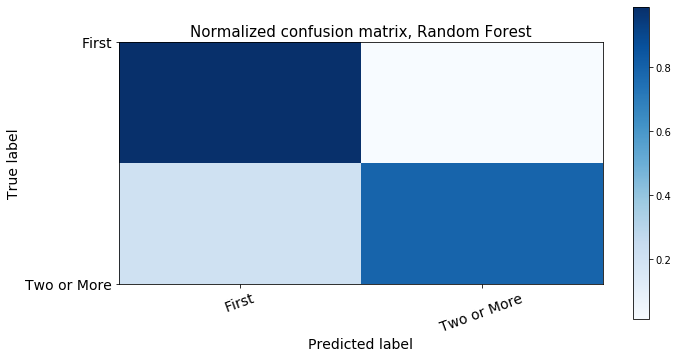

In [53]:
# Print classification report
print(classification_report(y_validation, valid_predict_rf_def))

class_names = ['First', 'Two or More']

# Compute confusion matrix
cnf_matrix_rf_def = confusion_matrix(y_validation, valid_predict_rf_def)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places

# Plot normalized confusion matrix
plt.figure(figsize=(10,5))
plot_confusion_matrix(cnf_matrix_rf_def, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, Random Forest')

In [54]:
# Random Forest, grid search varying the number of estimators
n_estimators = [200, 300, 350]

results_rf_n_est = pd.DataFrame([])

for i in range(0,3):
    
    print(i)
    
    n_est_value = n_estimators[i]

    rf_model = RandomForestClassifier(random_state = 75, n_jobs = 7, n_estimators = n_est_value)

    rf_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_rf = rf_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_rf, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_rf, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'n_estimators'] = n_est_value
    class_report.loc[:, 'model'] = 'Random Forest'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_rf_n_est = pd.concat([results_rf_n_est, class_report], axis = 0)


0
1
2


In [55]:
results_rf_n_est

,precision,recall,f1-score,support,accuracy,n_estimators,model,model_value
0,0.983333,0.989574,0.986444,13236.0,0.975002,200,Random Forest,First Treatment Episode
1,0.872340,0.809442,0.839715,1165.0,0.975002,200,Random Forest,2+ Treatment Episodes
0,0.983407,0.989574,0.986481,13236.0,0.975071,300,Random Forest,First Treatment Episode
1,0.872458,0.810300,0.840231,1165.0,0.975071,300,Random Forest,2+ Treatment Episodes
0,0.983410,0.989725,0.986557,13236.0,0.975210,350,Random Forest,First Treatment Episode
1,0.874074,0.810300,0.840980,1165.0,0.975210,350,Random Forest,2+ Treatment Episodes


In [56]:
# Random Forest, grid search varying the minimum samples per split
min_samples_split = [5, 9, 12, 18, 25]

results_rf_min_samp = pd.DataFrame([])

for i in range(0,5):
    
    print(i)
    
    min_samp_split_value = min_samples_split[i]

    rf_model = RandomForestClassifier(random_state = 75, n_jobs = 7, n_estimators = 300,
                                     min_samples_split = min_samp_split_value)

    rf_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_rf = rf_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_rf, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_rf, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'min_samples_split'] = min_samp_split_value
    class_report.loc[:, 'n_estimators'] = 300
    class_report.loc[:, 'model'] = 'Random Forest'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_rf_min_samp = pd.concat([results_rf_min_samp, class_report], axis = 0)
    

0
1
2
3
4


In [57]:
results_rf_min_samp

,precision,recall,f1-score,support,accuracy,min_samples_split,n_estimators,model,model_value
0,0.983645,0.990556,0.987088,13236.0,0.976182,5,300,Random Forest,First Treatment Episode
1,0.883396,0.812876,0.846670,1165.0,0.976182,5,300,Random Forest,2+ Treatment Episodes
0,0.983795,0.990707,0.987239,13236.0,0.976460,9,300,Random Forest,First Treatment Episode
1,0.885261,0.814592,0.848458,1165.0,0.976460,9,300,Random Forest,2+ Treatment Episodes
0,0.983648,0.990783,0.987203,13236.0,0.976391,12,300,Random Forest,First Treatment Episode
1,0.885875,0.812876,0.847807,1165.0,0.976391,12,300,Random Forest,2+ Treatment Episodes
0,0.983725,0.990934,0.987316,13236.0,0.976599,18,300,Random Forest,First Treatment Episode
1,0.887640,0.813734,0.849082,1165.0,0.976599,18,300,Random Forest,2+ Treatment Episodes
0,0.983801,0.991085,0.987429,13236.0,0.976807,25,300,Random Forest,First Treatment Episode
1,0.889410,0.814592,0.850358,1165.0,0.976807,25,300,Random Forest,2+ Treatment Episodes


In [58]:
# Random Forest, testing early stopping with a grid search on minimum impurity decrease per split
min_impurity_decrease = [0.001, 0.003, 0.005]

results_rf_imp_dec = pd.DataFrame([])

for i in range(0,3):
    
    print(i)
    
    min_imp_dec_value = min_impurity_decrease[i]

    rf_model = RandomForestClassifier(random_state = 75, n_jobs = 7, n_estimators = 300,
                                     min_impurity_decrease = min_imp_dec_value)

    rf_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_rf = rf_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_rf, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_rf, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'min_impurity_decrease'] = min_imp_dec_value
    class_report.loc[:, 'n_estimators'] = 300
    class_report.loc[:, 'model'] = 'Random Forest'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_rf_imp_dec = pd.concat([results_rf_imp_dec, class_report], axis = 0)


0
1
2


In [59]:
results_rf_imp_dec

,precision,recall,f1-score,support,accuracy,min_impurity_decrease,n_estimators,model,model_value
0,0.982782,0.991840,0.987290,13236.0,0.976529,0.001,300,Random Forest,First Treatment Episode
1,0.896453,0.802575,0.846920,1165.0,0.976529,0.001,300,Random Forest,2+ Treatment Episodes
0,0.965690,0.993049,0.979178,13236.0,0.961183,0.003,300,Random Forest,First Treatment Episode
1,0.883544,0.599142,0.714066,1165.0,0.961183,0.003,300,Random Forest,2+ Treatment Episodes
0,0.951923,0.994787,0.972883,13236.0,0.949031,0.005,300,Random Forest,First Treatment Episode
1,0.878735,0.429185,0.576701,1165.0,0.949031,0.005,300,Random Forest,2+ Treatment Episodes


In [60]:
# Random Forest, grid search varying the maximum features and minimum samples per split
max_features = [7, 10, 15]
min_samples_split = [9, 12]

results_rf_feat_samp_split = pd.DataFrame([])

for i, j in itertools.product(range(0,3), range(0,2)):
    
    print(i)
    print(j)
    
    max_feat_value = max_features[i]
    min_samp_split_value = min_samples_split[j]

    rf_model = RandomForestClassifier(random_state = 75, n_jobs = 7, n_estimators = 300,
                                     max_features = max_feat_value, min_samples_split = min_samp_split_value)

    rf_model.fit(x_train_sm, np.ravel(y_train, order='C'))

    valid_predict_rf = rf_model.predict(x_validation_sm)

    class_report = pd.DataFrame(classification_report(y_validation, valid_predict_rf, 
                                                      output_dict = True)).iloc[:, 0:2]

    class_report = class_report.T

    class_report.loc[:, 'accuracy'] = pd.DataFrame(classification_report(y_validation, valid_predict_rf, 
                                                                         output_dict = True)).iloc[1, 2]
    class_report.loc[:, 'n_estimators'] = 300
    class_report.loc[:, 'max_features'] = max_feat_value
    class_report.loc[:, 'min_samples_split'] = min_samp_split_value
    class_report.loc[:, 'model'] = 'Random Forest'
    class_report.loc[:, 'model_value'] = ['First Treatment Episode', '2+ Treatment Episodes']

    results_rf_feat_samp_split = pd.concat([results_rf_feat_samp_split, class_report], axis = 0)


0
0
0
1
1
0
1
1
2
0
2
1


In [61]:
results_rf_feat_samp_split

,precision,recall,f1-score,support,accuracy,n_estimators,max_features,min_samples_split,model,model_value
0,0.984084,0.990329,0.987197,13236.0,0.976391,300,7,9,Random Forest,First Treatment Episode
1,0.881591,0.818026,0.848620,1165.0,0.976391,300,7,9,Random Forest,2+ Treatment Episodes
0,0.983935,0.990254,0.987084,13236.0,0.976182,300,7,12,Random Forest,First Treatment Episode
1,0.880556,0.816309,0.847216,1165.0,0.976182,300,7,12,Random Forest,2+ Treatment Episodes
0,0.984369,0.989649,0.987002,13236.0,0.976043,300,10,9,Random Forest,First Treatment Episode
1,0.874771,0.821459,0.847278,1165.0,0.976043,300,10,9,Random Forest,2+ Treatment Episodes
0,0.984293,0.989498,0.986889,13236.0,0.975835,300,10,12,Random Forest,First Treatment Episode
1,0.873059,0.820601,0.846018,1165.0,0.975835,300,10,12,Random Forest,2+ Treatment Episodes
0,0.984287,0.989121,0.986698,13236.0,0.975488,300,15,9,Random Forest,First Treatment Episode
1,0.869091,0.820601,0.844150,1165.0,0.975488,300,15,9,Random Forest,2+ Treatment Episodes
